In [2]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

2025-11-05 22:16:37.562285: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


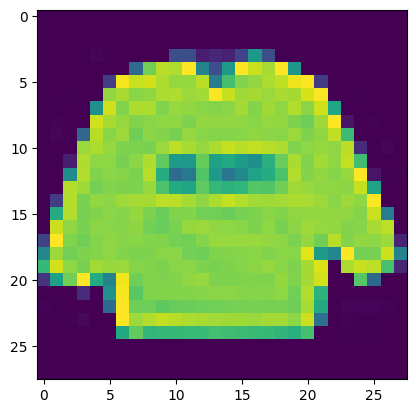

In [3]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [4]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [6]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [8]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [9]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8134 - loss: 0.5451 - val_accuracy: 0.8623 - val_loss: 0.3927
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8746 - loss: 0.3550 - val_accuracy: 0.8764 - val_loss: 0.3447
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8879 - loss: 0.3157 - val_accuracy: 0.8885 - val_loss: 0.3120
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8971 - loss: 0.2870 - val_accuracy: 0.8963 - val_loss: 0.2893
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9040 - loss: 0.2690 - val_accuracy: 0.8963 - val_loss: 0.2872
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9083 - loss: 0.2554 - val_accuracy: 0.8978 - val_loss: 0.2789
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9136 - loss: 0.2365 - val_accuracy: 0.8969 - val_loss: 0.2858
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9202 - loss: 0.2245 - val_accu

In [10]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.24126076698303223
Précision: 0.9138000011444092


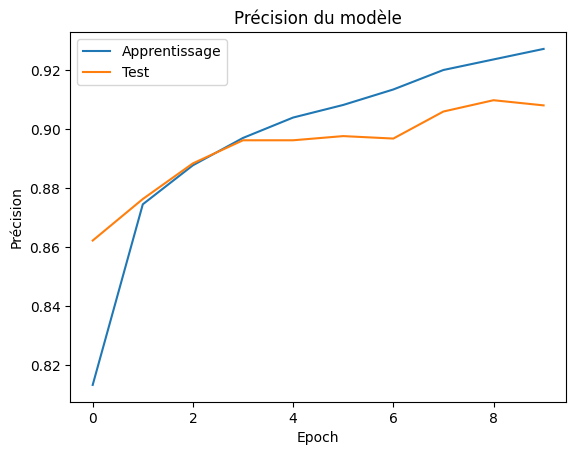

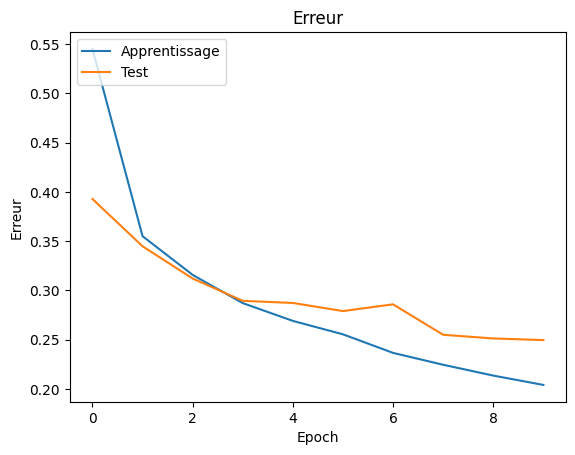

In [11]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [13]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.8253 - loss: 0.4691 - val_accuracy: 0.8382 - val_loss: 0.4249
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8281 - loss: 0.4609

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8281 - loss: 0.4609 - val_accuracy: 0.8473 - val_loss: 0.4167
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.8475 - loss: 0.4085 - val_accuracy: 0.8538 - val_loss: 0.3947
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8438 - loss: 0.3562 - val_accuracy: 0.8494 - val_loss: 0.4033
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8553 - loss: 0.3924 - val_accuracy: 0.8638 - val_loss: 0.3735
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8633 - loss: 0.4270 - val_accuracy: 0.8632 - val_loss: 0.3761
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8609 - loss: 0.3738 - val_accuracy: 0.8677 - val_loss: 0.3573
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8867 - loss: 0.3421 - val_accuracy: 0.8697 - val_loss: 0.3586
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.8648 - loss: 0.3642 - val_accuracy: 0

In [15]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !


In [16]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 174ms/step - accuracy: 0.7436 - loss: 0.7393 - val_accuracy: 0.2173 - val_loss: 2.5726
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 171ms/step - accuracy: 0.8424 - loss: 0.4393 - val_accuracy: 0.6245 - val_loss: 1.3889
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 171ms/step - accuracy: 0.8702 - loss: 0.3640 - val_accuracy: 0.8164 - val_loss: 0.5361
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 172ms/step - accuracy: 0.8839 - loss: 0.3285 - val_accuracy: 0.8882 - val_loss: 0.3203
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 172ms/step - accuracy: 0.8918 - loss: 0.3045 - val_accuracy: 0.9022 - val_loss: 0.2776
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 167ms/step - accuracy: 0.8988 - loss: 0.2839 - val_accuracy: 0.9020 - val_loss: 0.2610
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.9029 - loss: 0.2709 - val_accuracy: 0.9038 - val_loss: 0.2713
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.9078 - loss: 0

In [18]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.22117368876934052
Précision: 0.9205999970436096


In [22]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurones4Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurones4Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !
